In [1]:
# importing basic packages
import numpy as np 
import pandas as pd 
import datetime 
# Viz
import matplotlib.pyplot as plt 
import seaborn as sns 
import mlxtend
from mlxtend.plotting import heatmap
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.ensemble import RandomForestRegressor

# settings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the datasets
features = pd.read_csv('https://raw.githubusercontent.com/vishu3883/DATA_606/main/DATASETS/features.csv')
train    = pd.read_csv('https://raw.githubusercontent.com/vishu3883/DATA_606/main/DATASETS/train.csv')
stores   = pd.read_csv('https://raw.githubusercontent.com/vishu3883/DATA_606/main/DATASETS/stores.csv')

In [3]:
#merging the data
df1= train.merge(stores, how='left').merge(features, how='left')
df1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [4]:
data = df1[df1['Weekly_Sales'] >= 0]
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [5]:
data=data.fillna(0)
data.isna().sum()
data


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667


In [6]:
df1.replace({'A': 1, 'B': 2,'C':3},inplace=True)
df1['IsHoliday'] = df1['IsHoliday'].apply(lambda x: 1 if x == True else 0)
df1.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,1,1,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,0,1,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,0,1,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,0,1,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [7]:
df1.iloc[:,9:14]=df1.iloc[:,9:14].fillna(0)

In [8]:
data['markdown'] = data.iloc[:,9:14].sum(axis=1)
data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)
data.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,markdown
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,0.0
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106,0.0
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106,0.0
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106,0.0
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106,0.0


In [9]:
print('Percentage of the missing values.')
(100*data.isna().sum()/data.shape[0]).sort_values()

Percentage of the missing values.


Store           0.0
Dept            0.0
Date            0.0
Weekly_Sales    0.0
IsHoliday       0.0
Type            0.0
Size            0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
markdown        0.0
dtype: float64

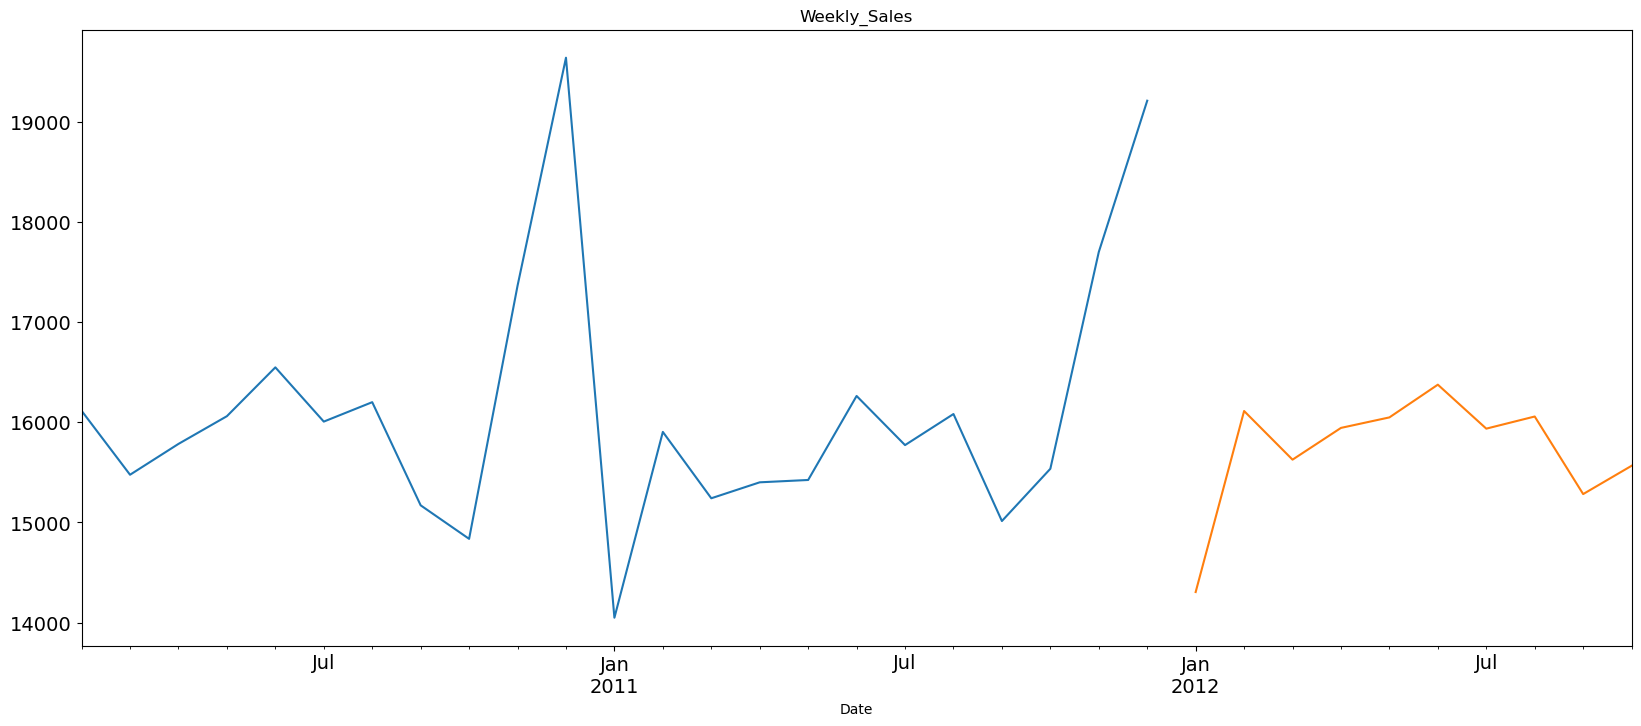

In [10]:
data.Date = pd.to_datetime(data.Date,format='%Y-%m-%d')
data.index = data.Date
data = data.drop('Date', axis=1)
# Resmapling the time series data with month starting first.
data = data.resample('MS').mean() 

# Train-Test splitting of time series data
train_data = data[:int(0.7*(len(data)))]
test_data = data[int(0.7*(len(data))):]

# ARIMA takes univariate data.
train_data = train_data['Weekly_Sales']
test_data = test_data['Weekly_Sales']

# Plot of Weekly_Sales with respect to years in train and test.
train_data.plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data.plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['Weekly_Sales'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -4.173916935101302
p-value: 0.000729184491532304
Critical Values:
	1%: -3.769732625845229
	5%: -3.005425537190083
	10%: -2.6425009917355373


In [12]:
! pip install pmdarima

In [13]:
from pmdarima.arima import auto_arima

In [14]:
model_auto_arima = auto_arima(train_data, trace=True, error_action='ignore', suppress_warnings=True)
model_auto_arima = auto_arima(train_data, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0, max_p=10, max_q=10, max_P=10, max_Q=10, seasonal=True,stepwise=False, suppress_warnings=True, D=1, max_D=10,error_action='ignore',approximation = False)
model_auto_arima.fit(train_data)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=405.580, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=398.029, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=399.847, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=399.604, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=513.059, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=401.739, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.340 seconds
 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=398.029, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=399.604, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=399.342, Time=0.18 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=399.847, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=401.7

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

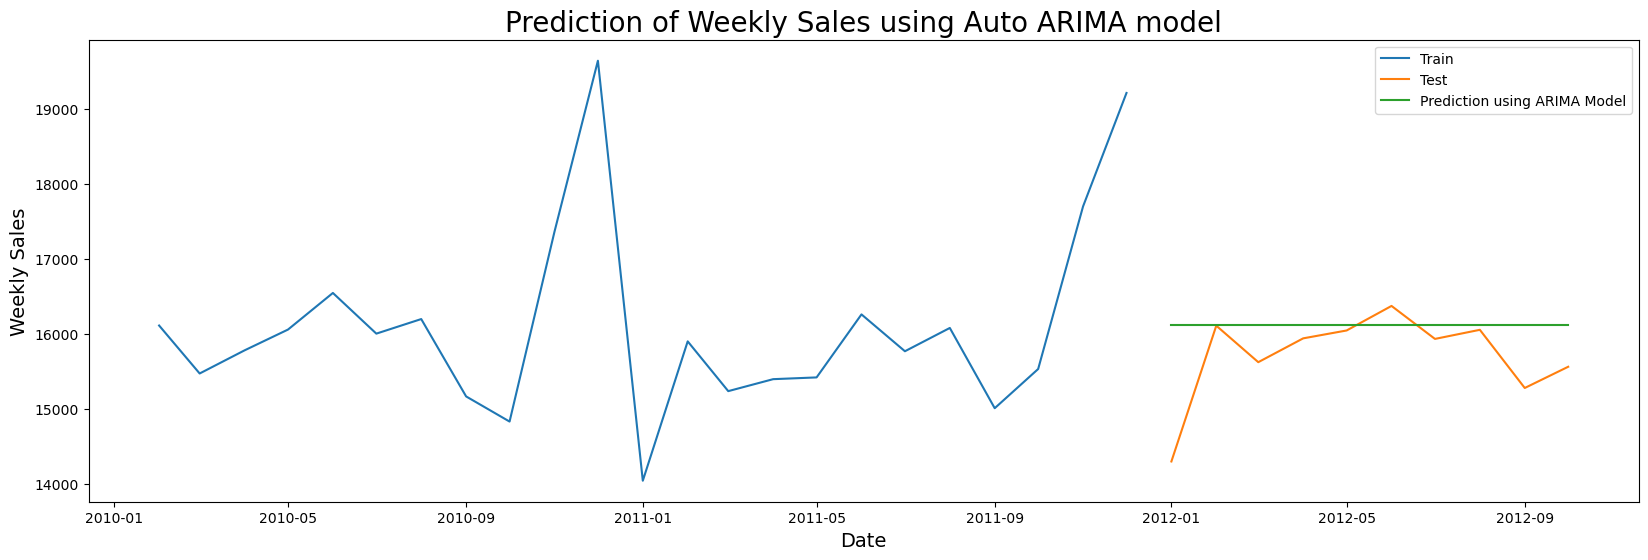

In [15]:
# Predicting the test values using predict function.
forecast = model_auto_arima.predict(n_periods=len(test_data))
forecast = pd.DataFrame(forecast,index = test_data.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using Auto ARIMA model', fontsize=20)
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(forecast, label='Prediction using ARIMA Model')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [16]:
#Performance metric for ARIMA model -MSE/RMSE
print('Mean Squared Error (MSE) of ARIMA: ', mean_squared_error(test_data, forecast))
print('Root Mean Squared Error (RMSE) of ARIMA: ', np.sqrt(metrics.mean_squared_error(test_data, forecast)))
print('Mean Absolute Deviation (MAD) of ARIMA: ', metrics.mean_squared_error(test_data, forecast))

Mean Squared Error (MSE) of ARIMA:  469971.08318422036
Root Mean Squared Error (RMSE) of ARIMA:  685.5443699602677
Mean Absolute Deviation (MAD) of ARIMA:  469971.08318422036


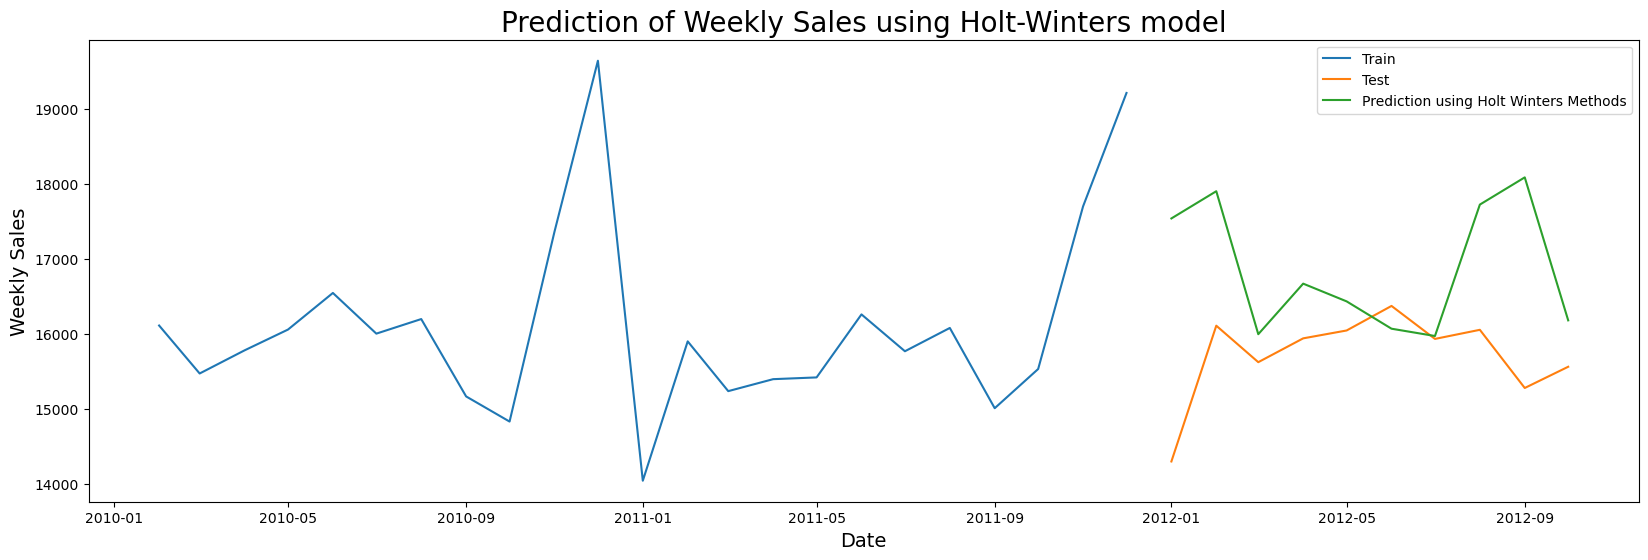

In [17]:
# Fitting the Holt-Winters method for Weekly Sales.
from statsmodels.tsa.api import ExponentialSmoothing
model_holt_winters = ExponentialSmoothing(train_data, seasonal_periods=7, trend='additive', seasonal='additive').fit() 
pred = model_holt_winters.forecast(len(test_data))# Predict the test data
#Visualize train, test and predicted data.
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using Holt-Winters model', fontsize=20)
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(pred, label='Prediction using Holt Winters Methods')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [18]:
print('Mean Squared Error (MSE) of Holt-Winters: ', mean_squared_error(test_data, pred))
print('Root Mean Squared Error (RMSE) of Holt-Winters: ', np.sqrt(metrics.mean_squared_error(test_data, pred)))
print('Mean Absolute Deviation (MAD) of Holt-Winters: ', metrics.mean_squared_error(test_data, pred))

Mean Squared Error (MSE) of Holt-Winters:  2562196.2003083867
Root Mean Squared Error (RMSE) of Holt-Winters:  1600.6861654641696
Mean Absolute Deviation (MAD) of Holt-Winters:  2562196.2003083867


In [23]:
train_data

Date
2010-02-01    16115.148511
2010-03-01    15476.271493
2010-04-01    15784.325587
2010-05-01    16061.212479
2010-06-01    16548.757204
2010-07-01    16007.065129
2010-08-01    16201.136071
2010-09-01    15170.876851
2010-10-01    14836.014357
2010-11-01    17363.277836
2010-12-01    19641.281744
2011-01-01    14048.348515
2011-02-01    15904.117630
2011-03-01    15241.333119
2011-04-01    15400.713958
2011-05-01    15424.052663
2011-06-01    16263.172898
2011-07-01    15772.449686
2011-08-01    16082.682055
2011-09-01    15013.965477
2011-10-01    15536.033513
2011-11-01    17700.949518
2011-12-01    19211.934999
Freq: MS, Name: Weekly_Sales, dtype: float64